# Exploring Dandiset 001366: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

**Important Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This notebook explores Dandiset [001366](https://dandiarchive.org/dandiset/001366/0.250324.1603) (version 0.250324.1603).

**Dandiset Name:** Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

**Description:** This Dandiset contains movies of a pial vessel of mice used in experiments related to the comparison of approaches for surface vessel diameter and pulsatility quantification.

**Dandiset URL:** [https://dandiarchive.org/dandiset/001366/0.250324.1603](https://dandiarchive.org/dandiset/001366/0.250324.1603)

## What this notebook covers

This notebook will guide you through the following steps:
1. Listing required Python packages.
2. Loading the Dandiset metadata using the DANDI API.
3. Listing some assets (NWB files) within the Dandiset.
4. Loading a specific NWB file from the Dandiset.
5. Summarizing the contents of the NWB file.
6. Providing a link to explore the NWB file on Neurosift.
7. Loading and visualizing a sample of imaging data from the NWB file.
8. Summarizing findings and suggesting potential future directions.

## Required Packages

This notebook requires the following Python packages. It is assumed they are already installed on your system.

* `dandi` (for interacting with the DANDI Archive)
* `pynwb` (for reading NWB files)
* `h5py` (dependency for `pynwb` for HDF5 file access)
* `remfile` (for streaming remote files)
* `matplotlib` (for plotting)
* `numpy` (for numerical operations)
* `itertools` (used in DANDI API example)
* `seaborn` (for plot styling)

## Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import matplotlib.pyplot as plt
import numpy as np
import pynwb
import h5py
import remfile
import seaborn as sns

# Set seaborn theme for plots (excluding images)
sns.set_theme()

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001366"
dandiset_version = "0.250324.1603"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

### Print basic information about the Dandiset

In [3]:
# Get raw metadata (this might make a network request)
# To avoid errors if the ROME client is used which doesn't have get_raw_metadata
# we can use get_metadata() and access known fields.
try:
    metadata = dandiset.get_raw_metadata()
    print(f"Dandiset name: {metadata.get('name', 'N/A')}")
    # The URL is fixed and known, but if available in metadata, it could be printed
    # print(f"Dandiset URL: {metadata.get('url', 'N/A')}")
except AttributeError:
    # Fallback for clients that don't have get_raw_metadata
    metadata = dandiset.get_metadata()
    print(f"Dandiset name: {metadata.name if hasattr(metadata, 'name') else 'N/A'}")

print(f"Dandiset ID: {dandiset_id}")
print(f"Dandiset Version: {dandiset_version}")
print(f"Dandiset URL: https://dandiarchive.org/dandiset/{dandiset_id}/{dandiset_version}")

Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification
Dandiset ID: 001366
Dandiset Version: 0.250324.1603
Dandiset URL: https://dandiarchive.org/dandiset/001366/0.250324.1603


### List some assets in the Dandiset

In [4]:
assets = dandiset.get_assets()
print("First 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

First 5 assets:
- sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (ID: 71fa07fc-4309-4013-8edd-13213a86a67d)
- sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (ID: 2f12bce3-f841-46ca-b928-044269122a59)


## Loading an NWB file

We will now load one of the NWB files from the Dandiset. For this example, we'll use the file:
`sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb`.

The asset ID for this file is `2f12bce3-f841-46ca-b928-044269122a59`.
The direct download URL for this asset, which we will use, is:
`https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/`

In [5]:
# Load the NWB file
# The URL is hard-coded as per the instructions, derived from the `nwb-file-info` tool output.
nwb_file_url = "https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/"

print(f"Loading NWB file from: {nwb_file_url}")

try:
    remote_file = remfile.File(nwb_file_url)
    h5_file = h5py.File(remote_file, mode='r') # Ensure read-only mode
    io = pynwb.NWBHDF5IO(file=h5_file, mode='r', load_namespaces=True) # Ensure read-only mode
    nwb = io.read()
    print("NWB file loaded successfully.")
except Exception as e:
    print(f"Error loading NWB file: {e}")
    nwb = None # Set nwb to None if loading fails

Loading NWB file from: https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/


NWB file loaded successfully.


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### NWB File Metadata
If the file loaded successfully, let's look at some of its metadata.

In [6]:
if nwb:
    print(f"Session Description: {nwb.session_description}")
    print(f"Identifier: {nwb.identifier}")
    print(f"Session Start Time: {nwb.session_start_time}")
    if nwb.experimenter:
        print(f"Experimenter(s): {', '.join(nwb.experimenter)}")
    else:
        print("Experimenter(s): Not specified")
    print(f"Institution: {nwb.institution}")
    if nwb.subject:
        print(f"Subject ID: {nwb.subject.subject_id}")
        print(f"Subject Species: {nwb.subject.species}")
else:
    print("NWB file object is not available.")

Session Description: the mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Identifier: Qinwen_6th_March_03122024-m4-baseline
Session Start Time: 2024-03-12 01:00:00-04:00
Experimenter(s): Huang, Qinwen
Institution: University of Rochester
Subject ID: 031224_M4
Subject Species: Mus musculus


## Summary of NWB File Contents

Based on the `nwb-file-info` tool (and direct inspection if loaded), the selected NWB file (`sub-031224-M4/..._image.nwb`) contains:

*   **Session Description:** "the mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a headpost. A cranial window was created over the MCA territory. Then the mouse was moved to a two-photon microscope for imaging with a 20x objective lens (Olympus). The imaging depth from the cortical surface to the focal plane was ~100 μm. Blood vessels were visualized by intravenous injection of Texas Red dextran (70 kDa)." (Partially inferred, full description from NWB file: `nwb.session_description`).
*   **Identifier:** `Qinwen_6th_March_03122024-m4-baseline`
*   **Session Start Time:** `2024-03-12T01:00:00-04:00`
*   **Experimenter(s):** `Huang, Qinwen`
*   **Acquisition Data:**
    *   `Movies`: An `ImageSeries` object.
        *   Description: "16-bit grayscale movie of a pial vessel"
        *   Data shape: `(6000, 512, 512)` (frames, height, width)
        *   Data type: `uint16`
        *   Frame rate (rate): `30.0` Hz
        *   Unit: `n.a.`
*   **Subject Information:**
    *   Age: `P2M` (Postnatal 2 months)
    *   Sex: `M` (Male)
    *   Species: `Mus musculus`
    *   Strain: `C57BL/6`
    *   Subject ID: `031224_M4`

The primary data appears to be two-photon imaging movies of pial vessels.

### Explore on Neurosift

You can explore this NWB file interactively on Neurosift using the following link:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/&dandisetId=001366&dandisetVersion=0.250324.1603](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/&dandisetId=001366&dandisetVersion=0.250324.1603)

## Load and Visualize Data from the NWB File

We will now load a single frame from the `Movies` acquisition data and display it. The `Movies.data` object is an HDF5 dataset, so we need to explicitly slice it to load data into memory.

Movies data shape: (6000, 512, 512)
Movies data type: uint16


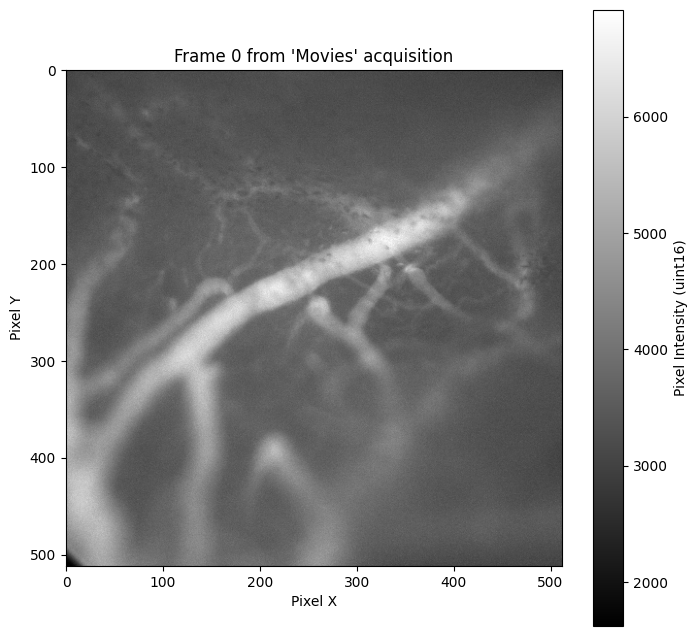

In [7]:
if nwb and "Movies" in nwb.acquisition:
    movies_data = nwb.acquisition["Movies"].data
    print(f"Movies data shape: {movies_data.shape}")
    print(f"Movies data type: {movies_data.dtype}")

    # Select a frame to display (e.g., the first frame)
    frame_index_to_display = 0 # You can change this to view other frames
    if movies_data.shape[0] > frame_index_to_display:
        # Load only the selected frame into memory
        # Using [frame_index_to_display] directly on the HDF5 dataset
        # is efficient as it loads only that specific frame.
        example_frame = movies_data[frame_index_to_display, :, :]

        plt.figure(figsize=(8, 8))
        # Not using seaborn style for images
        plt.style.use('default') # Revert to default matplotlib style for this plot
        plt.imshow(example_frame, cmap='gray')
        plt.title(f"Frame {frame_index_to_display} from 'Movies' acquisition")
        plt.xlabel("Pixel X")
        plt.ylabel("Pixel Y")
        plt.colorbar(label="Pixel Intensity (uint16)")
        plt.show()

        # Re-apply seaborn theme if other plots follow
        sns.set_theme()
    else:
        print(f"Frame index {frame_index_to_display} is out of bounds for movies data with shape {movies_data.shape}")
else:
    print("NWB file or 'Movies' acquisition not available for visualization.")

The plot above shows a single frame from the two-photon imaging movie. This gives a snapshot of the pial vessel structure at a specific time point. The data is 16-bit, providing a good dynamic range for intensity values.

## Summary and Future Directions

This notebook demonstrated how to:
*   Connect to the DANDI archive and retrieve information about Dandiset 001366.
*   List assets within the Dandiset.
*   Load a specific NWB file (`sub-031224-M4/..._image.nwb`) from the Dandiset by streaming its content from the web.
*   Inspect basic metadata and structure of the NWB file.
*   Visualize a sample frame from the `Movies` `ImageSeries` contained in the NWB file.

### Possible Future Directions:

1.  **Analyze Vessel Dynamics:** The primary data consists of movies. One could analyze these movies to:
    *   Quantify vessel diameter changes over time.
    *   Measure vessel pulsatility.
    *   Track blood flow characteristics (if applicable and visible).
2.  **Process Image Stacks:** For volumetric imaging data (if present in other files or if this is a Z-stack represented as a time series), reconstruct 3D volumes.
3.  **Compare Across Subjects/Sessions:** If other NWB files in the Dandiset represent different subjects or experimental conditions (e.g., `sub-F15/..._image.nwb`), comparative analyses could be performed.
4.  **Explore Other Data Types:** While this file primarily showcased `ImageSeries`, other NWB files or other sections within this file might contain different data types (e.g., time series related to physiological signals, behavioral data, etc.) that could be explored.
5.  **Apply Image Processing Techniques:** Use image processing libraries (e.g., OpenCV, Scikit-image) for tasks like image registration, segmentation, or feature extraction from the vessel movies.

This notebook provides a starting point. The specific analysis will depend on the research questions and the full content of the Dandiset. Remember to consult the Dandiset's documentation and associated publications for more context.

End of notebook.